In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

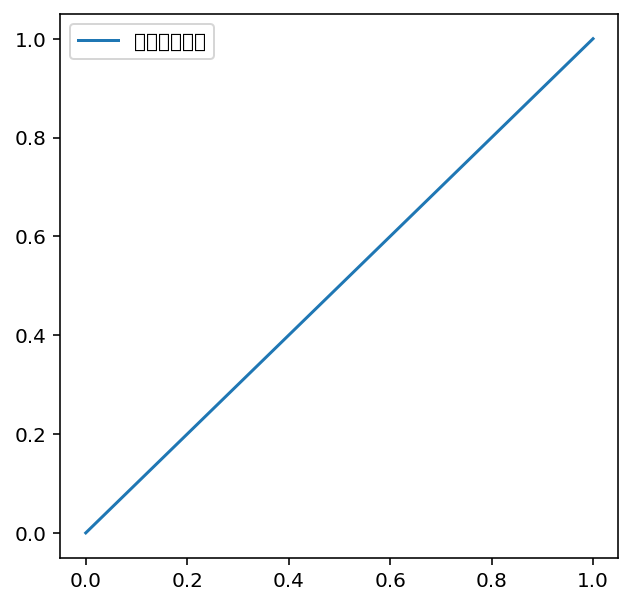

In [3]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [0]:
train = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/train.json', typ = 'frame')
val = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/val.json', typ = 'frame')
test = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/test.json', typ = 'frame')
song_meta = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/song_meta.json', typ = 'frame')
genre_gn_all = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/genre_gn_all.json', typ = 'series')

In [0]:
for data in [train,val,test]:
  data['년도'] = data['updt_date'].apply(lambda x: x[:4])  
  data['월'] = data['updt_date'].apply(lambda x: x[5:7])
  data['시간대'] = data['updt_date'].apply(lambda x:x[11:13])

# 아티스트 컬럼 전처리

In [6]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [7]:
song_meta['artist_id_count'] = song_meta['artist_id_basket'].apply(lambda x: len(x))
song_meta['artist_name_count'] = song_meta['artist_name_basket'].apply(lambda x: len(x))\

artist_frame=song_meta[['artist_id_basket','artist_name_basket','artist_id_count','artist_name_count']].copy()
artist_frame.head()

,artist_id_basket,artist_name_basket,artist_id_count,artist_name_count
0,[2727],[Various Artists],1,1
1,[29966],[Murray Perahia],1,1
2,[3361],[Peter Gabriel],1,1
3,[838543],[Matoma],1,1
4,[560160],[Jude Law],1,1


아디스트 아이디와 이름이 Mapping이 되지 않는 경우가 있다.
- 아이디는 하나인데 아티스트 이름이 두명으로 나오는 그런 경우

In [8]:
artist_frame[artist_frame['artist_id_count'] != artist_frame['artist_name_count']]

,artist_id_basket,artist_name_basket,artist_id_count,artist_name_count
6238,[56936],"[Liberty, City]",1,2
15100,[232053],"[Los, Dioses]",1,2
64162,"[174433, 1543263, 1459364, 2240313]","[Daniel Hope, Christian Badzura, Jane Berthe, ...",4,5
72352,[232053],"[Los, Dioses]",1,2
76782,[232053],"[Los, Dioses]",1,2
76944,[236266],"[The Randy Watson Experience &, Bilal]",1,2
122311,[56936],"[Liberty, City]",1,2
207607,[965703],"[A`Typisk, ]",1,2
222961,[232053],"[Los, Dioses]",1,2
271176,[232053],"[Los, Dioses]",1,2


Case 1
- artist_id_count:1	artist_name_count:2

In [0]:
artist_frame.loc[(artist_frame['artist_id_count']==1)& (artist_frame['artist_name_count']==2),'artist_name_basket']=\
artist_frame.loc[(artist_frame['artist_id_count']==1)& (artist_frame['artist_name_count']==2),'artist_name_basket'].apply(lambda x: ('').join(('').join(x).split(',')).split(','))

Case 2
- artist_id_count:2	artist_name_count:3

In [0]:
artist_frame.loc[(artist_frame['artist_id_count']==2)& (artist_frame['artist_name_count']==3),'artist_name_basket']=\
artist_frame.loc[(artist_frame['artist_id_count']==2)& (artist_frame['artist_name_count']==3),'artist_name_basket'].apply(lambda x: (' ').join(x).split('  '))

Case 3
- artist_id_count:3 artist_name_count:4

In [0]:
artist_frame.loc[(artist_frame['artist_id_count']==3)& (artist_frame['artist_name_count']==4),'artist_name_basket'].values[0].remove('')

In [12]:
artist_frame.loc[(artist_frame['artist_id_count']==3)& (artist_frame['artist_name_count']==4),'artist_name_basket'].values[0]

['Henri Lanz', 'Skinny Williams', 'WILLIAM RAPPAPORT']

Case 4
- artist_id_count:4 artist_name_count:5

In [0]:
artist_frame.loc[(artist_frame['artist_id_count']==4)& (artist_frame['artist_name_count']==5),'artist_name_basket'].values[0].remove('Z&#252;rcher')

In [14]:
artist_frame.loc[(artist_frame['artist_id_count']==4)& (artist_frame['artist_name_count']==5),'artist_name_basket'].values[0]

['Daniel Hope', 'Christian Badzura', 'Jane Berthe', 'Kammerorchester']

---
 다시 한번 확인해 보자.

In [0]:
artist_frame['revised_artist_name_count'] = artist_frame['artist_name_basket'].apply(lambda x: len(x))

In [16]:
artist_frame[artist_frame['revised_artist_name_count'] != artist_frame['artist_id_count']]

,artist_id_basket,artist_name_basket,artist_id_count,artist_name_count,revised_artist_name_count


아티스트 ID와 아티스트 Name의 개수가 잘 맞춰진 것으로 확인된다.

In [0]:
song_meta['revised_artist_basket']=artist_frame['artist_name_basket']

In [0]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.revised_artist_basket)))
artist_list=list(np.concatenate(song_meta['revised_artist_basket'].values))
song_artist=pd.DataFrame({'song_id':song_id,'artist' : artist_list})

In [19]:
song_artist

,song_id,artist
0,0,Various Artists
1,1,Murray Perahia
2,2,Peter Gabriel
3,3,Matoma
4,4,Jude Law
...,...,...
779457,707984,Fela Kuti
779458,707985,Cyndi Lauper
779459,707986,윤종신
779460,707987,Nature Piano


In [20]:
song_id=np.repeat(song_meta['id'].values,list(map(len,song_meta.artist_id_basket)))
artist_list=list(np.concatenate(song_meta['artist_id_basket'].values))
#song_artist['artist_id'] = artist_list

len(artist_list)

779462

In [0]:
song_artist['artist_id'] = artist_list

In [22]:
song_artist['artist_id'].unique().shape

(115457,)

# Artist Vector

In [0]:
song_artist_dict= {song_meta.loc[idx,'id']:song_meta.loc[idx,'revised_artist_basket'] for idx in song_meta.index}

In [0]:
# 해당 아티스트 이름을 그대로 넣는다.
train['artists']= train['songs'].apply(lambda x: np.concatenate([song_artist_dict[song] for song in x]))

In [25]:
train

,tags,id,plylst_title,songs,like_cnt,updt_date,년도,월,시간대,artists
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,2013,12,18,"[The Sol, Royal Bangs, Honeymoon Suite, Phoeni..."
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,2014,12,16,"[이승환, 윤하 (YOUNHA), 윤하 (YOUNHA), 윤하 (YOUNHA), 박..."
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,2017,08,07,"[소울라이츠, 소울라이츠, 뷰티핸섬, 소울사이어티, 카멜, 오디오라인 (Audiol..."
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,2019,12,15,"[Idina Menzel, Aurora, 김동률, Ashley Tisdale, Ma..."
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,2011,10,13,"[장나라, 영턱스클럽, 젝스키스, 박진영, 보아 (BoA), DJ DOC, 핑클 (..."
...,...,...,...,...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000,2020,04,04,"[DevilDriver, American Head Charge, American H..."
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000,2015,12,17,"[Komes, Ctrl Alt Del, Parachute Youth, Alex Bo..."
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000,2019,08,20,"[김진호 (SG워너비), 가비엔제이, FTISLAND (FT아일랜드), SG 워너비..."
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000,2019,10,23,"[Air, Mew, Thom Yorke, Bon Iver, St. Vincent, ..."


In [26]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,년도,월,시간대,artists
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,2013,12,18,"[The Sol, Royal Bangs, Honeymoon Suite, Phoeni..."
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,2014,12,16,"[이승환, 윤하 (YOUNHA), 윤하 (YOUNHA), 윤하 (YOUNHA), 박..."
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,2017,08,07,"[소울라이츠, 소울라이츠, 뷰티핸섬, 소울사이어티, 카멜, 오디오라인 (Audiol..."
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,2019,12,15,"[Idina Menzel, Aurora, 김동률, Ashley Tisdale, Ma..."
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,2011,10,13,"[장나라, 영턱스클럽, 젝스키스, 박진영, 보아 (BoA), DJ DOC, 핑클 (..."


In [30]:
train[train['artists'].apply(lambda x: '빈지노 (Beenzino)' in x)]

,tags,id,plylst_title,songs,like_cnt,updt_date,년도,월,시간대,artists
13,"[힙합, 느낌있는, 밤, 새벽, RnB, 감각적인, 드라이브, 국내, 그루브한]",89809,트렌디하고 그루브한 힙합/알앤비 MUSIC,"[525152, 38765, 66139, 696379, 397438, 144461,...",1112,2018-01-09 14:01:53.000,2018,01,14,"[우원재, 박재범, 더블케이 (Double K), 보이비, $ept Rabbit, ..."
61,"[기분전환, 매장음악]",33019,취향저격 앨범아트,"[97087, 682900, 490966, 703312, 64930, 417626,...",213,2017-03-29 19:51:15.000,2017,03,19,"[Jack Garratt, 크래커 (CRACKER), Neiked, Red Velv..."
64,"[차막힘, 차막힐때, 댄스, 졸릴때]",45163,졸음운전방지※댄스댄스한 플레이리스트♥,"[284179, 231154, 158153, 393277, 568089, 47037...",105,2016-11-11 17:11:06.000,2016,11,17,"[H.O.T., 젝스키스, 젝스키스, 젝스키스, H.O.T., H.O.T., 채연,..."
91,"[힙합, 랩]",110924,언제들어도 효과 만점인 매력 힙합,"[607673, 534609, 672319, 270941, 661213, 42260...",4,2015-11-16 10:47:58.000,2015,11,10,"[인피닛플로우 (I.F), 카이, Crush, 비프리 (B-Free), 스윙스, G..."
150,"[기분전환, 휴식, 느낌있는, 주말, 야경]",73145,"주말, 도시의 야경을 바라보며 듣기 좋은 노래","[446812, 266393, 477905, 291668, 705515, 55784...",12,2019-06-14 09:50:59.000,2019,06,09,"[백예린, 멜트인멜트, 어반자카파, DJ Okawari, Norah Jones, S..."
...,...,...,...,...,...,...,...,...,...,...
114927,"[힙합, 랩]",137129,나른한 주말 힙합음악과 함께 +아리아나 홀릭,"[358186, 263881, 598654, 145222, 107841, 52434...",3,2015-02-15 14:58:16.000,2015,02,14,"[Ariana Grande, The Quiett, Dok2, 빈지노 (Beenzin..."
114944,"[여름, 휴식, 신남, 드라이브, 여행, 바다]",33045,BEST OF BEST 드라이브 음악,"[464562, 371998, 391992, 695494, 633203, 48680...",108,2020-02-13 16:48:58.000,2020,02,16,"[Supreme Team, 인피니트H, 빈지노 (Beenzino), 로꼬, GRAY..."
114965,"[위클리초이스, 기분전환, izm, 웹진이즘]",57290,2016년 가요계 결산 올해의 앨범 & 올해의 싱글,"[707517, 524662, 351829, 549027, 441211, 69815...",52,2016-12-16 10:29:08.000,2016,12,10,"[전범선과 양반들, 전범선과 양반들, 진보, 정새난슬, 정새난슬, 정새난슬, 정새난..."
115014,"[랩, 힙합]",71413,내 취향,"[109190, 439630, 636672, 88556, 159956, 280491...",2,2015-09-23 09:52:16.000,2015,09,09,"[Jazzyfact, 흑꼬, M.I.B, 일렉트로보이즈, 팬텀, 케이준, 긱스 (G..."
